### Differential Expression of UC vs CD PBMCs

The goal of this analysis is to determine the genes that are expressed differently (higher or lower) between the PBMCs of the  Crohns Disease and Ulcerative Colitis patients.

In [1]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib
matplotlib.style.use('ggplot')

pd.options.display.max_columns = 100
df = pd.read_csv('crohns.csv', index_col='ID_REF')

In [2]:
df.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,...,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,...,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,...,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.326602,

In [63]:
#construct three lists of disease types
#construct three lists of disease types
UC = ['GSM76030', 'GSM76031', 'GSM76032', 'GSM76033', 'GSM76034', 'GSM76035', 'GSM76036', 'GSM76037', 'GSM76038', 'GSM76039',
     'GSM76040', 'GSM76041', 'GSM76042', 'GSM76043', 'GSM76044', 'GSM76045', 'GSM76046', 'GSM76047', 'GSM76048', 'GSM76049', 
     'GSM76050', 'GSM76051', 'GSM76052', 'GSM76053', 'GSM76054', 'GSM76055']

CD = ['GSM76056', 'GSM76057', 'GSM76058', 'GSM76059', 'GSM76060', 'GSM76061', 'GSM76062', 'GSM76063', 'GSM76064', 'GSM76065',
     'GSM76066', 'GSM76067', 'GSM76068', 'GSM76069', 'GSM76070', 'GSM76071', 'GSM76072', 'GSM76073', 'GSM76074', 'GSM76075',
     'GSM76076', 'GSM76077', 'GSM76078', 'GSM76079', 'GSM76080', 'GSM76081', 'GSM76082', 'GSM76083', 'GSM76084', 'GSM76085',
     'GSM76086', 'GSM76087', 'GSM76088', 'GSM76089', 'GSM76090', 'GSM76091', 'GSM76092', 'GSM76093', 'GSM76094', 'GSM76095',
     'GSM76096', 'GSM76097', 'GSM76098', 'GSM76099', 'GSM76100', 'GSM76101', 'GSM76102', 'GSM76103', 'GSM76104', 'GSM76105',
     'GSM76106', 'GSM76107', 'GSM76108', 'GSM76109', 'GSM76110', 'GSM76111', 'GSM76112', 'GSM76113', 'GSM76114']

NM = ['GSM76115', 'GSM76116', 'GSM76117', 'GSM76118', 'GSM76119', 'GSM76120', 'GSM76121', 'GSM76122', 'GSM76123', 'GSM76124', 
      'GSM76125', 'GSM76126', 'GSM76127', 'GSM76128', 'GSM76129', 'GSM76130', 'GSM76131', 'GSM76132', 'GSM76133', 'GSM76134', 
      'GSM76135', 'GSM76136', 'GSM76137', 'GSM76138', 'GSM76139', 'GSM76140', 'GSM76141', 'GSM76142', 'GSM76143', 'GSM76144', 
      'GSM76145', 'GSM76146', 'GSM76147', 'GSM76148', 'GSM76149', 'GSM76150', 'GSM76151', 'GSM76152', 'GSM76153', 'GSM76154', 
      'GSM76155', 'GSM76156']

In [64]:
#compare only CD and NM so will drop CD

cd_uc = df.drop(columns=NM)

In [65]:
cd_uc.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,GSM76080,GSM76081,GSM76082,GSM76083,GSM76084,GSM76085,GSM76086,GSM76087,GSM76088,GSM76089,GSM76090,GSM76091,GSM76092,GSM76093,GSM76094,GSM76095,GSM76096,GSM76097,GSM76098,GSM76099,GSM76100,GSM76101,GSM76102,GSM76103,GSM76104,GSM76105,GSM76106,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,6.507124,5.573721,6.034489,5.560913,6.449540,6.606058,6.166005,5.458709,5.984609,6.473074,6.061145,5.984445,6.107115,6.651910,6.502437,6.727001,6.602522,6.218555,5.861260,6.917447,6.621767,6.773892,6.559339,5.854622,6.416390,6.467302,6.288461,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,4.977893,4.966231,5.238487,5.843106,4.490475,5.132728,3.817865,5.116208,4.770213,4.666003,5.206459,4.664170,5.143706,4.814863,4.221642,4.736269,4.176312,5.227773,5.119223,4.485952,5.480261,4.967559,4.143689,4.609251,5.103296,5.061839,5.062016,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,5.507064,6.330960,6.667612,8.176896,5.694784,6.573464,7.178956,5.399936,5.476469,4.937230,6.970623,6.409427,5.470768,6.565419,5.310412,5.940312,6.574211,5.142489,6.552839,4.447533,2.843318,5.028513,5.549716,5.978831,5.350719,5.771431,6.308454,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.326602,8.238403,8.147193,8.553576,7.855156,7.748579,8.538472,8.041587,7.835483,8.070539,8.047381,7.684614,7.964292,8.067246,7.928308,8.108317,8.391588,8.095294,8.375151,8.211907,7.648273,8.293901,8.245957,8.337700,7.957588,7.948497,7.810091,7.631065,8.325043,8.085109,8.246151,7.683691,8.102369,7.945266,8.149849,8.193053,8.340246,8.298260,8.260884,8.513641,8.091763,7.807638,7.866646,8.395867,8.572264,8.545203,7.971261,7.919174,7.684086,7.942339,7.990819,7.862925,8.456400,8.780061,8.276506,8.217866,8.258389,8.168814,8.053621
1255_g_at,3.529799,3.434311,4.393491,3.379032,1.88

In [66]:
cd_uc.describe()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,GSM76080,GSM76081,GSM76082,GSM76083,GSM76084,GSM76085,GSM76086,GSM76087,GSM76088,GSM76089,GSM76090,GSM76091,GSM76092,GSM76093,GSM76094,GSM76095,GSM76096,GSM76097,GSM76098,GSM76099,GSM76100,GSM76101,GSM76102,GSM76103,GSM76104,GSM76105,GSM76106,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114
count,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000
mean,5.091014,5.337954,5.176947,5.095218,4.832847,4.916582,5.102724,5.068267,5.265786,5.089211,5.184235,5.147241,5.139282,5.119878,5.151902,5.134589,5.115141,5.032407,5.114922,4.975056,5.061665,4.981375,5.071559,5.067427,5.032960,4.981319,5.117655,5.169349,4.992013,5.131158,4.947674,4.917584,5.394539,4.964877,4.865968,4.948043,5.059827,5.061648,4.984194,4.993731,4.845193,5.111969,5.056283,5.001174,5.227631,5.227523,5.016745,5.149438,5.030719,5.199529,5.004344,4.988830,5.015540,4.920062,5.100417,5.093481,5.002725,5.035604,4.988486,5.015442,5.054089,5.329586,5.095873,5.192346,5.102810,5.311456,5.245274,4.979278,4.957926,5.025284,5.013717,5.282793,5.042176,4.986797,5.041841,5.068134,4.968765,5.094226,5.054635,5.396235,5.227707,5.218840,4.915016,5.120552,5.026895
std,2.507524,2.306108,2.442225,2.496283,2.685257,2.618854,2.506809,2.529524,2.359056,2.534840,2.428715,2.435132,2.470421,2.490179,2.443262,2.447465,2.469176,2.522407,2.500880,2.574243,2.522074,2.585782,2.495092,2.546764,2.553230,2.591168,2.431533,2.379309,2.542861,2.442274,2.578428,2.622004,2.165066,2.610187,2.633781,2.628837,2.472114,2.476782,2.587452,2.541589,2.688028,2.429889,2.503174,2.521762,2.394623,2.375684,2.521195,2.433307,2.519299,2.372644,2.581522,2.605847,2.562415,2.611100,2.510218,2.485464,2.508757,2.540595,2.538722,2.564898,2.513986,2.172903,2.475215,2.398645,2.519126,2.331796,2.394796,2.564368,2.610359,2.558208,2.568670,2.333365,2.496558,2.548437,2.534954,2.539554,2.628956,2.549879,2.527600,2.200431,2.405462,2.394050,2.578460,2.468504,2.506634
min,-5.130264,-2.961710,-2.187247,-4.370191,-4.970616,-4.872562,-4.719452,-4.026722,-3.717990,-3.436307,-3.467709,-3.550245,-3.395185,-4.865101,-4.507730,-3.350692,-3.673555,-2.527907,-2.983840,-4.611297,-4.757501,-4.880785,-3.786831,-3.254909,-3.245697,-3.810622,-3.788604,-1.881374,-4.586371,-5.944038,-3.903447,-5.167837,-2.127627,-3.589372,-3.865185,-3.791977,-3.015923,-3.854774,-5.312954,-3.237347,-2.929611,-3.315465,-5.039026,-3.540594,-3.756565,-3.902972,-4.025853,-4.491608,-4.869480,-3.561375,-4.033133,-3.404840,-4.119617,-4.236639,-3.708019,-4.737889,-2.809327,-4.482033,

In [67]:
t_cd_uc = StandardScaler().fit_transform(cd_uc.T)

### PCA Analysis

In [68]:
pca = PCA()

In [69]:
pca.fit(t_cd_uc)

PCA()

In [70]:
pca_data = pca.transform(t_cd_uc)

In [71]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [72]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #from StatQuest:PCA in Python on youtube.com 

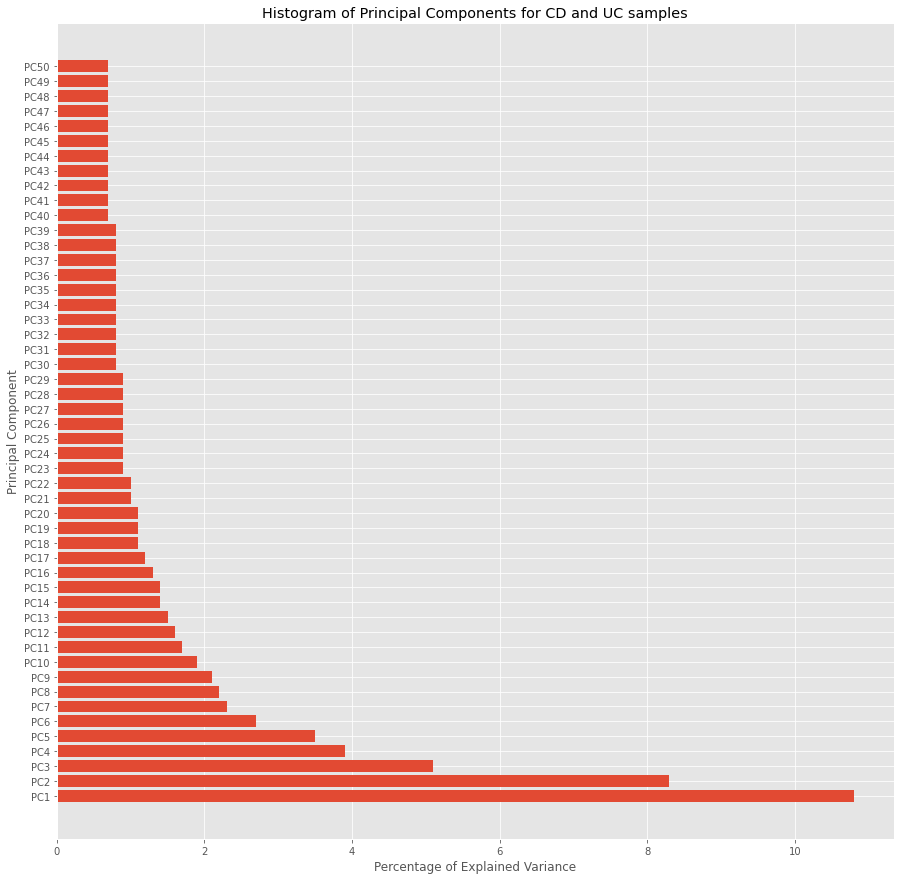

In [97]:
plt.figure(figsize = (15, 15))
plt.barh(y=range(1,len(per_var)+1)[:50], width=per_var[:50], tick_label=labels[:50])
plt.ylabel('Principal Component')
plt.xlabel('Percentage of Explained Variance')
plt.title('Histogram of Principal Components for CD and UC samples')
plt.show()

In [74]:
pca_df = pd.DataFrame(pca_data, index=cd_uc.columns, columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85
GSM76030,-30.718531,-30.668560,5.002894,-8.558317,6.032826,-39.828624,2.109901,-5.537201,1.057188,-11.236538,-4.342796,-19.371508,14.592185,-8.865101,19.171624,-17.553433,20.963064,-47.269119,-2.648389,-34.341181,8.916413,3.633054,0.554259,-6.790094,-11.675604,21.699373,20.415118,-0.271018,-2.776188,-14.934396,-10.705148,7.030954,11.522760,7.198172,-5.272139,2.115001,9.951117,-3.672188,18.338896,0.076096,-3.692096,-0.142932,-1.961450,-3.996739,-6.497911,-5.925002,28.845309,-1.794013,32.387087,-13.450157,4.799806,9.463668,-14.833790,-3.769380,-4.655913,-8.253397,-1.783799,-2.056146,8.916839,-0.089991,16.715757,-11.711996,-22.117413,5.007593,10.952314,-3.713413,33.746159,2.067541,6.738536,-12.385744,18.439637,-6.049716,3.238003,-4.155470,5.330838,21.997959,18.075037,-2.125301,3.487808,4.609611,2.254002,-9.658710,5.672796,-7.957546,3.136380e-15
GSM76031,67.041507,-4.424622,53.950230,-32.172734,-28.107318,-4.446418,-24.587310,-33.155303,-14.614130,-17.692275,-1.497447,14.163465,20.235533,-10.391261,-12.534654,4.963693,7.146707,8.904493,11.706490,0.819100,-1.186890,8.971482,-0.686866,6.454815,7.849754,-10.945917,1.768678,-12.369364,-6.895921,5.304633,13.502702,-8.448839,-1.544419,-1.916130,7.699004,-4.885810,5.451026,9.397375,-7.724219,-3.400917,-10.281787,-9.195015,-3.638904,-14.358389,-3.877360,-4.145348,8.463453,1.105165,-0.518487,-11.115345,-9.146557,5.393988,-7.479809,-12.614942,-6.458000,-2.740274,-4.711493,23.309651,-3.666711,-18.513479,11.251631,0.106483,1.689451,0.992346,-0.552399,36.608211,-8.891737,17.779708,10.050544,-13.680000,12.649391,7.146920,-14.387107,-0.865889,6.849646,-1.631443,-22.184362,-25.313025,39.653524,-1.486780,2.188465,-18.025933,-17.460422,-2.432704,2.634004e-14
GSM76032,29.992469,65.786548,61.538634,4.722795,15.169326,0.265850,-17.051180,27.403299,-3.968135,5.483339,-6.231510,-11.834988,-11.764503,-53.704340,-35.311546,28.698160,3.916766,-18.876441,35.560255,0.545627,4.598906,40.429336,2.978802,5.310097,2.688073,-22.727700,14.177457,33.457590,43.456158,-2.925107,-7.729459,-3.767524,15.658552,10.171050,-9.286903,6.867295,-2.052402,-11.822019,22.335098,13.557672,6.111216,-22.591936,-9.352139,-0.911919,-24.502481,19.778146,-15.333551,-1.397284,2.513777,-1.778344,12.725338,-3.821465,0.453180,-1.288973,3.894464,2.661260,-0.523201,-0.163943,5.407563,-2.845770,-12.129295,-0.385778,-1.290777,-8.183646,-5.120033,-3.420991,-1.003883,-5.268412,1.104599,-4.362802,1.164131,0.732307,-0.171463,4.540700,2.283302,-1.961281,0.144017,-0.911935,-4.540874,-5.409718,-3.694165,-2.215356,-4.317943,2.379934,-5.356826e-14
GSM76033,-16.666057,49.347174,38.896335,-11.252078,-4.314527,43.599227,-21.404029,-17.752330,-38.554948,2.135730,0.477781,4.446581,1.458220,-17.256790,-4.641765,-6.805724,-5.043593,-1.930592,-0.198470,0.799657,2.910389,-0.022426,-8.879274,1.942936,5.234707,-1.463200,-3.865653,-0.843059,0.553447,3.446755,7.569441,16.352263,-6.725049,-3.546915,7.505463,-0.000792,1.410925,-2.646038,-0.870796,-4.472467,-1.762268,5.908630,14.857498,-2.533183,-0.717386,-8.525014,-7.042475,-1.386989,-1.404826,-1.782279,5.593959,3.669887,1.150744,3.792995,-7.102165,-2.716205,-5.452626,12.418660,-4.037457,3.691632,2.339583,1.082302,4.087638,5.717063,-3.834769,-13.934371,1.352701,-8.997259,4.321978,7.753511,14.822749,-5.928428,-11.005462,-25.254591,-8.198192,3.010647,5.552751,-20.443752,8.271144,-33.756849,18.109615,16.516592,57.975304,3.139610,-2.296080e-14
GSM76034,-70.665459,-9.926133,-38.279156,27.262363,-41.971351,29.282664,-20.799388,-9.824782,14.543132,-2.859233,4.920844,14.682246,-8.779298,7.845187,14.915669,-31.637543

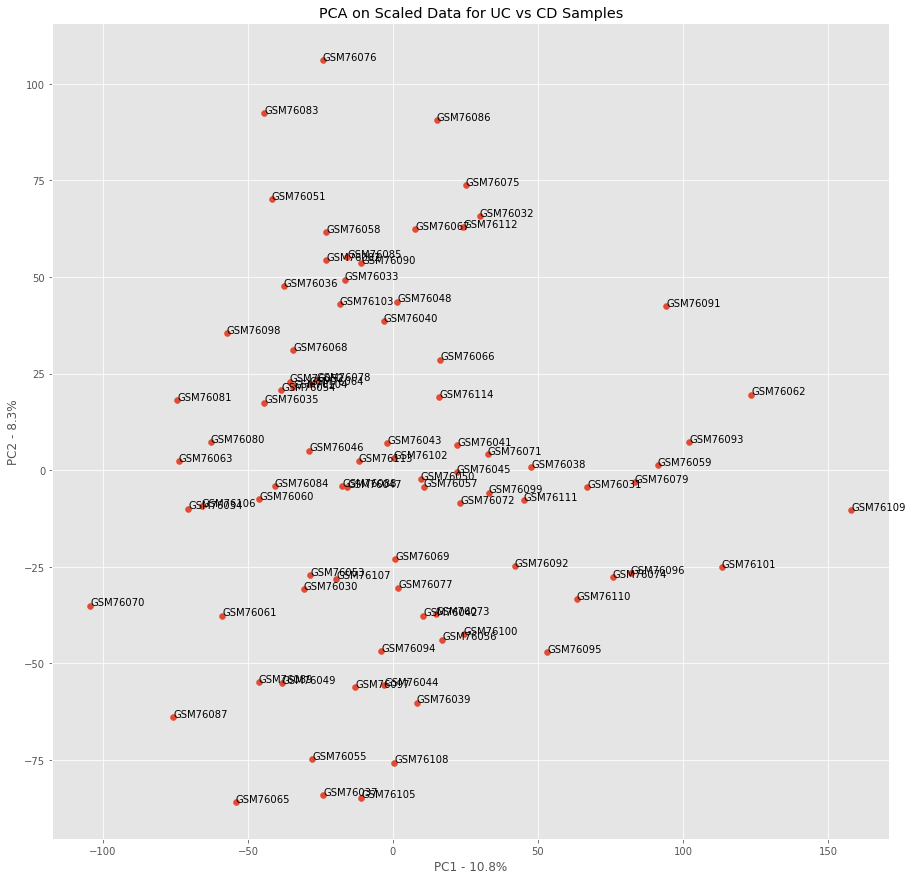

In [75]:
#Scatterplot of data with first and second principal components
plt.figure(figsize = (15, 15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA on Scaled Data for UC vs CD Samples')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

### Determine which genes are differentially expressed

In [76]:
loading_scores = pd.Series(pca.components_[0], index=cd_uc.index)

In [77]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [78]:
top_genes = sorted_loading_scores[0:50].index.values
top_genes

array(['205918_at', '210051_at', '207685_at', '205021_s_at', '207140_at',
       '206725_x_at', '211788_s_at', '205600_x_at', '222114_x_at',
       '48612_at', '211518_s_at', '216854_at', '205902_at', '207035_at',
       '221870_at', '207027_at', '217377_x_at', '214192_at',
       '203365_s_at', '213466_at', '213310_at', '210923_at',
       '217040_x_at', '78047_s_at', '1494_f_at', '209543_s_at',
       '208494_at', '216993_s_at', '208532_x_at', '216707_at',
       '221966_at', '201149_s_at', '206196_s_at', '212383_at',
       '219268_at', '203899_s_at', '220222_at', '215584_at', '221859_at',
       '221456_at', '211314_at', '216671_x_at', '41856_at', '210704_at',
       '221409_at', '217001_x_at', '202410_x_at', '215153_at', '57703_at',
       '221454_at'], dtype=object)

### NCBI GEO2R Analysis via limma and UMAP libraries

In [79]:
geo_cd_uc = pd.read_csv('cd_vs_uc.top.table.csv', index_col='ID')
geo_df = geo_cd_uc['Gene.title'][:10]
geo_df

ID
211430_s_at         microRNA 8071-2///microRNA 8071-1///immunoglob...
211074_at                                           folate receptor 1
216892_at           immunoglobulin heavy constant gamma 1 (G1m mar...
AFFX-M27830_M_at                                                  NaN
204838_s_at                                            mutL homolog 3
215176_x_at         immunoglobulin kappa locus///immunoglobulin ka...
211643_x_at         immunoglobulin kappa locus///immunoglobulin ka...
218381_s_at                   U2 small nuclear RNA auxiliary factor 2
214836_x_at         immunoglobulin kappa locus///immunoglobulin ka...
218711_s_at                                serum deprivation response
Name: Gene.title, dtype: object

In [99]:
genes = []
for id in top_genes:
    result = geo_cd_uc.loc[id]
    genes.append(result[-1])
genes

top50 = list(zip(top_genes, genes))
cd_uc_top50 = pd.DataFrame(top50, columns = ['ID', 'PCA Differential'])
cd_uc_top50.head()

,ID,PCA Differential
0,205918_at,solute carrier family 4 member 3
1,210051_at,Rap guanine nucleotide exchange factor 3
2,207685_at,crystallin beta B3
3,205021_s_at,forkhead box N3
4,207140_at,"alkaline phosphatase, intestinal"


In [100]:
compare = cd_uc_top50['PCA Differential'][:10]
compare

0                     solute carrier family 4 member 3
1             Rap guanine nucleotide exchange factor 3
2                                   crystallin beta B3
3                                      forkhead box N3
4                     alkaline phosphatase, intestinal
5                         bone morphogenetic protein 1
6    HAUS augmin like complex subunit 7///three pri...
7                                          homeobox B5
8                                  WD repeat domain 55
9                              NEDD4 binding protein 1
Name: PCA Differential, dtype: object

In [101]:
compare = pd.DataFrame(list(zip(compare, geo_df[:10])), columns=['PCA Differential/CD vs UC', 'Bioconductor Differential/CD vs UC'])
compare.head()

,PCA Differential/CD vs UC,Bioconductor Differential/CD vs UC
0,solute carrier family 4 member 3,microRNA 8071-2///microRNA 8071-1///immunoglob...
1,Rap guanine nucleotide exchange factor 3,folate receptor 1
2,crystallin beta B3,immunoglobulin heavy constant gamma 1 (G1m mar...
3,forkhead box N3,NaN
4,"alkaline phosphatase, intestinal",mutL homolog 3


In [103]:
compare = compare.fillna('Affy Gene')
compare.head(10)

,PCA Differential/CD vs UC,Bioconductor Differential/CD vs UC
0,solute carrier family 4 member 3,microRNA 8071-2///microRNA 8071-1///immunoglob...
1,Rap guanine nucleotide exchange factor 3,folate receptor 1
2,crystallin beta B3,immunoglobulin heavy constant gamma 1 (G1m mar...
3,forkhead box N3,Affy Gene
4,"alkaline phosphatase, intestinal",mutL homolog 3
5,bone morphogenetic protein 1,immunoglobulin kappa locus///immunoglobulin ka...
6,HAUS augmin like complex subunit 7///three pri...,immunoglobulin kappa locus///immunoglobulin ka...
7,homeobox B5,U2 small nuclear RNA auxiliary factor 2
8,WD repeat domain 55,immunoglobulin kappa locus///immunoglobulin ka...
9,NEDD4 binding protein 1,serum deprivation response


### KMeans Clustering

In [104]:
cd_uc_km = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
cd_uc_km

,PC1,PC2
GSM76030,-30.718531,-30.668560
GSM76031,67.041507,-4.424622
GSM76032,29.992469,65.786548
GSM76033,-16.666057,49.347174
GSM76034,-70.665459,-9.926133
...,...,...
GSM76110,63.392872,-33.404660
GSM76111,45.151130,-7.694665
GSM76112,24.236709,62.912980
GSM76113,-11.805543,2.274962


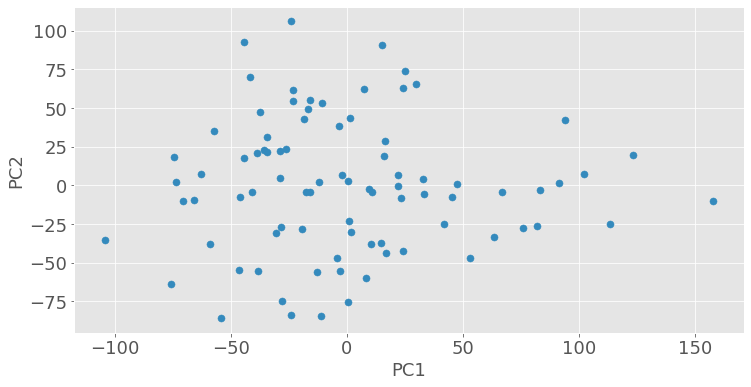

In [105]:
# Plot the scatter
ax = cd_uc_km.plot(kind="scatter", x='PC1', y='PC2', figsize=(12,6), s=50)
plt.xlabel("PC1", fontsize=18)
plt.ylabel("PC2", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [106]:
X = cd_uc_km.loc[:, ['PC1', 'PC2']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Comparing 2 clusters

In [107]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=2, random_state=42)

In [108]:
km.cluster_centers_

array([[-0.51485589,  0.72904373],
       [ 0.47975208, -0.67933621]])

In [109]:
km.predict(X_sc)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [110]:
cd_uc_km['cluster'] = km.labels_
cd_uc_km

,PC1,PC2,cluster
GSM76030,-30.718531,-30.668560,1
GSM76031,67.041507,-4.424622,1
GSM76032,29.992469,65.786548,0
GSM76033,-16.666057,49.347174,0
GSM76034,-70.665459,-9.926133,0
...,...,...,...
GSM76110,63.392872,-33.404660,1
GSM76111,45.151130,-7.694665,1
GSM76112,24.236709,62.912980,0
GSM76113,-11.805543,2.274962,0


In [111]:
actuals = []
for item in UC:
    actuals.append(0)

In [112]:
for item in CD:
    actuals.append(1)

In [113]:
cd_uc_km['actual'] = actuals
cd_uc_km

,PC1,PC2,cluster,actual
GSM76030,-30.718531,-30.668560,1,0
GSM76031,67.041507,-4.424622,1,0
GSM76032,29.992469,65.786548,0,0
GSM76033,-16.666057,49.347174,0,0
GSM76034,-70.665459,-9.926133,0,0
...,...,...,...,...
GSM76110,63.392872,-33.404660,1,1
GSM76111,45.151130,-7.694665,1,1
GSM76112,24.236709,62.912980,0,1
GSM76113,-11.805543,2.274962,0,1


In [114]:
cd_uc_km.groupby('cluster').mean()

,PC1,PC2,actual
cluster,,,
0,-25.305352,31.328604,0.682927
1,23.579987,-29.192563,0.704545


In [115]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=['PC1', 'PC2']
)
centroids

,PC1,PC2
0,-25.305352,31.328604
1,23.579987,-29.192563


<Figure size 504x504 with 0 Axes>

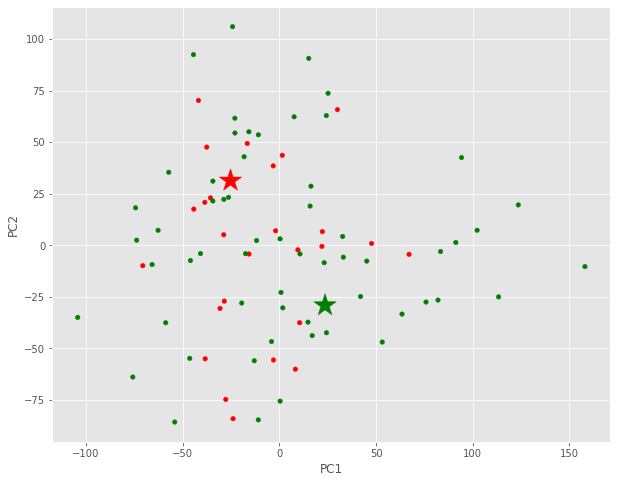

In [116]:
# Code modified from Generally Assembly Data Science Immersive-KMeans Lesson

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green"]
cd_uc_km['color'] = cd_uc_km['actual'].map(lambda p: colors[p])


ax = cd_uc_km.plot(    
    kind="scatter", 
    x='PC1', y='PC2',
    figsize=(10,8),
    c = cd_uc_km['color']
)

centroids.plot(
    kind="scatter", 
    x='PC1', y='PC2', 
    marker="*", c=["r", "g"], s=550,
    ax=ax
);

### Compare to UMAP in limma/Bioconductor

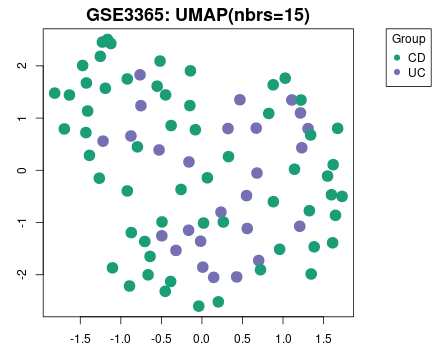